In [2]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [3]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [4]:
df = pd.read_csv("../data/8.dataframe_limpio.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q6_exp_num,q25_salario_new,q25_salario_cat
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",52.0,50-59,Man,India,Bachelor’s degree,Other,7.5,27499.5,30.000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",52.0,50-59,Man,Other,Master’s degree,Program/Project Manager,2.0,64999.5,100.000


In [5]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q25_salario', 'q33_bigdata_product',
       'q41_h_process_data', 'q1_edad_num', 'q1_edad_new', 'q2_genero_new',
       'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new', 'q6_exp_num',
       'q25_salario_new', 'q25_salario_cat'],
      dtype='object')

# 1. Perfil de los y las trabajadores en la ciencia de datos y el aprendizaje automático

In [6]:
df_perfil = df.drop(columns=['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q33_bigdata_product',
       'q41_h_process_data', 'q25_salario_new'], axis=1)

In [7]:
df_perfil.head(2)

,q6_exp_tech,q25_salario,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q6_exp_num,q25_salario_cat
0,5-10 years,"25,000-29,999",52.0,50-59,Man,India,Bachelor’s degree,Other,7.5,30.000
1,20+ years,"60,000-69,999",52.0,50-59,Man,Other,Master’s degree,Program/Project Manager,2.0,100.000


In [8]:
df_perfil.columns

Index(['q6_exp_tech', 'q25_salario', 'q1_edad_num', 'q1_edad_new',
       'q2_genero_new', 'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new',
       'q6_exp_num', 'q25_salario_cat'],
      dtype='object')

In [9]:
columnas_perfil= ['q1_edad_new', 'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new', 'q6_exp_tech']

In [10]:
def graficar_countplot (df,lista):

    df_lista = df[lista]
    fig, axes = plt.subplots(1, len(lista), figsize=(25,6))

    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
        
    for i in range(len(df_lista.columns)):
        sns.set_theme(style="whitegrid")# grid
        sns.countplot(x = df_lista.columns[i], data = df, ax=axes[i],palette = 'Set2', hue="q2_genero_new",  dodge = False)
    
    return plt.show();

## 1.1 Género

### ¿Cómo es la distribución por género? ¿Existe igualdad de género en el mundo de la ciencia de datos y el aprendizaje automático?

La gráfica evidencia la brecha de género en el mundo laboral, que se extrapola al mundo de los datos y machine learning.

In [11]:
df_genero = df.q2_genero.value_counts().reset_index()

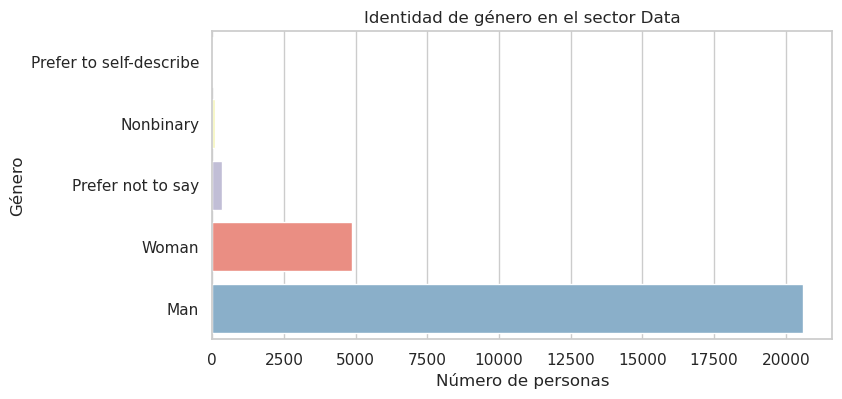

In [12]:
plt.figure(figsize=(8,4), dpi=100)
sns.set_theme(style="whitegrid")# grid
sns.barplot( y = "index" , x= "q2_genero" , 
            data=df_genero ,
            palette = 'Set3',
            order= ['Prefer to self-describe','Nonbinary','Prefer not to say', 'Woman','Man'])
plt.title('Identidad de género en el sector Data')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel('Género'); # definir el nombre del eje Y
plt.savefig("graficas/01-Identidad-genero.png")
plt.show();


## 1.2 Info general por género

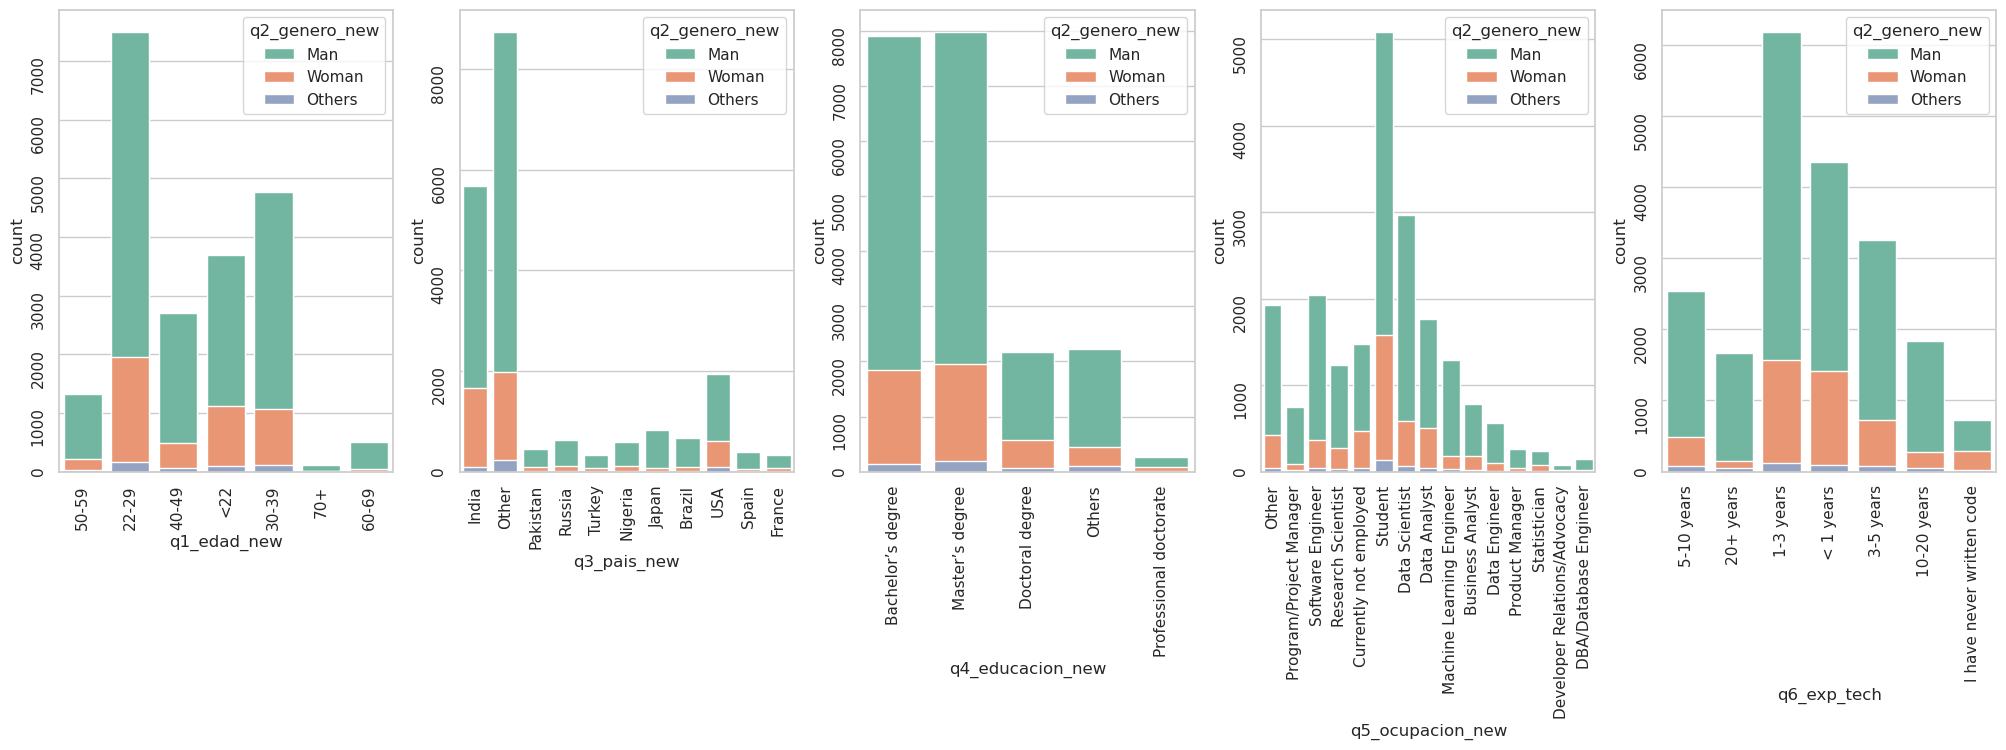

In [13]:
graficar_countplot(df_perfil,columnas_perfil)

Edad y género

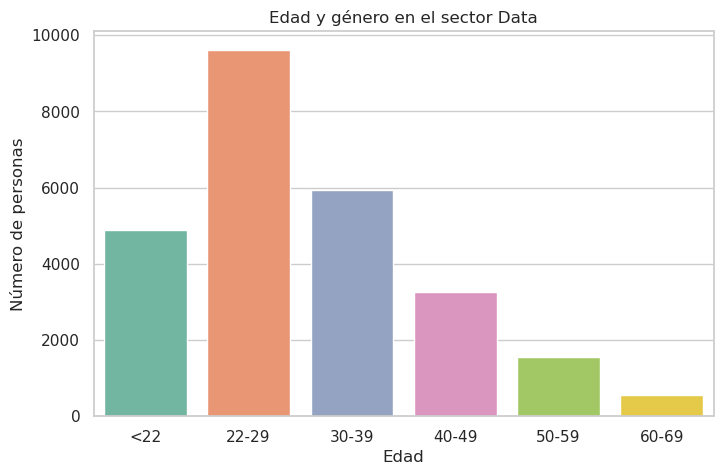

In [14]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(x= "q1_edad_new" , 
            data=df, 
            #hue= 'q2_genero_new',
            palette = 'Set2', 
            order=['<22','22-29', '30-39', '40-49', '50-59', '60-69']
            )
plt.title('Edad y género en el sector Data')
plt.xlabel('Edad') # definir el nombre del eje X
plt.ylabel('Número de personas'); # definir el nombre del eje Y
plt.savefig("graficas/03-edad-genero.png")
plt.show();

Países y género

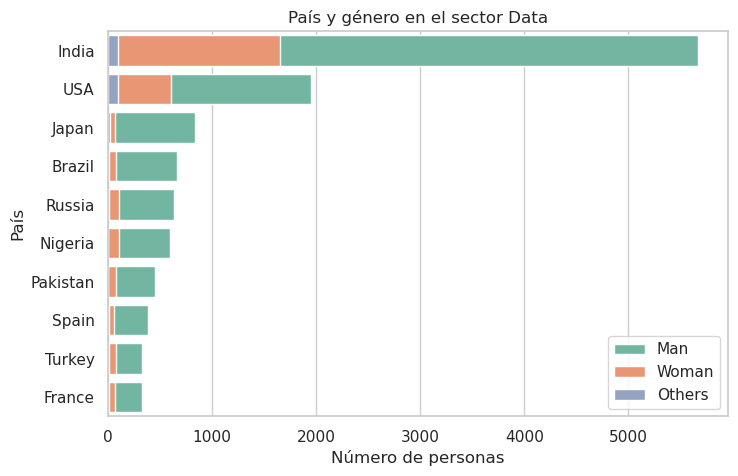

In [15]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= 'q3_pais_new' , 
            data=df, 
            hue= 'q2_genero_new',  dodge = False,
            palette = 'Set2', 
            order=['India', 'USA', 'Japan', 'Brazil', 'Russia', 'Nigeria','Pakistan', 'Spain', 'Turkey', 'France']
            )
plt.title('País y género en el sector Data')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("País"); # definir el nombre del eje Y
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/04-Pais-genero.png")
plt.show();

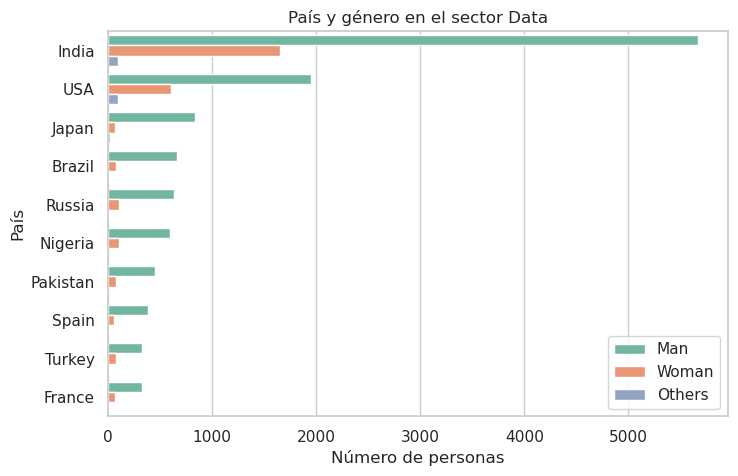

In [16]:
#sns.countplot(data=df , , hue=  "q2_genero_new");

plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= 'q3_pais_new' , 
            data=df, 
            hue= 'q2_genero_new',
            palette = 'Set2', 
            order=['India', 'USA', 'Japan', 'Brazil', 'Russia', 'Nigeria','Pakistan', 'Spain', 'Turkey', 'France']
            )
plt.title('País y género en el sector Data')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("País"); # definir el nombre del eje Y
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/04-Pais-genero.png")
plt.show();

In [17]:
df_analistas = df[df['q5_ocupacion'] == 'Data Analyst']

In [18]:
df_analistas["q3_pais_new"].value_counts().index

Index(['Other', 'India', 'USA', 'Nigeria', 'Russia', 'Brazil', 'Japan',
       'Pakistan', 'France', 'Spain', 'Turkey'],
      dtype='object')

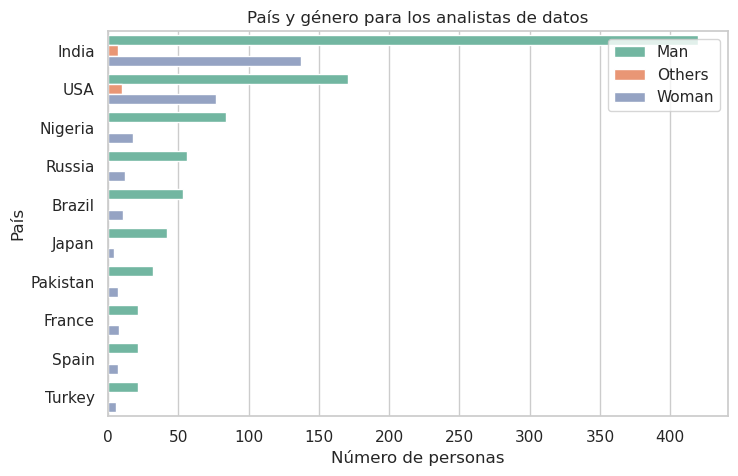

In [19]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= 'q3_pais_new' , 
            data=df_analistas, 
            hue= 'q2_genero_new',
            palette = 'Set2',
            order=['India', 'USA', 'Nigeria', 'Russia', 'Brazil', 'Japan',
                'Pakistan', 'France', 'Spain', 'Turkey']
            )
plt.title('País y género para los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("País"); # definir el nombre del eje Y
plt.legend( ['Man','Others','Woman'] , loc="upper right")
# plt.legend(loc="lower right")
plt.savefig("graficas/05-pais-genero-data.png")
plt.show();

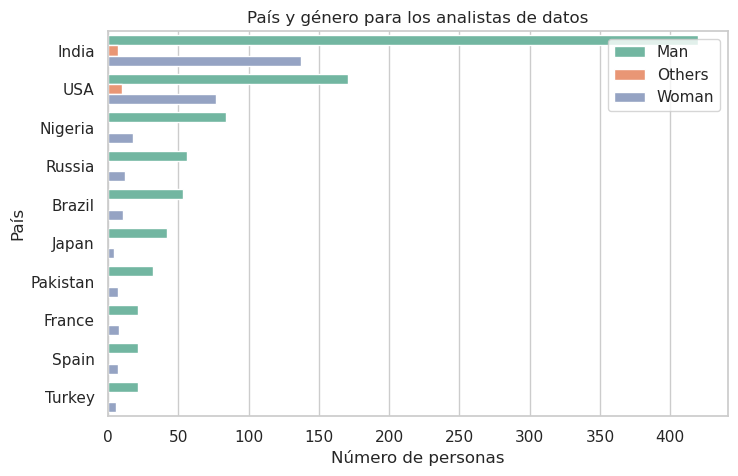

In [20]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= 'q3_pais_new' , 
            data=df_analistas, 
            hue= 'q2_genero_new',
            palette = 'Set2',
            order=['India', 'USA', 'Nigeria', 'Russia', 'Brazil', 'Japan',
                'Pakistan', 'France', 'Spain', 'Turkey']
            )
plt.title('País y género para los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("País"); # definir el nombre del eje Y
plt.legend((['Man','Others','Woman']))
plt.savefig("graficas/05-pais-genero-data.png")
plt.show();

Educación

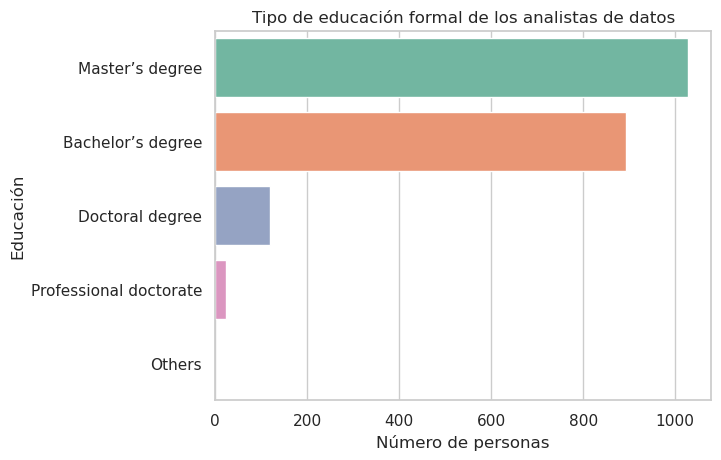

In [21]:
sns.set_theme(style="whitegrid")# grid
sns.countplot(y='q4_educacion', 
            data= df_analistas, 
            #hue = 'q2_genero_new', 
            palette = 'Set2', 
            order = ['Master’s degree', 'Bachelor’s degree',  'Doctoral degree','Professional doctorate', 'Others'] 
            );
plt.title('Tipo de educación formal de los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("Educación"); # definir el nombre del eje Y
plt.savefig("graficas/06-educacion-data.png")

Ocupación y género

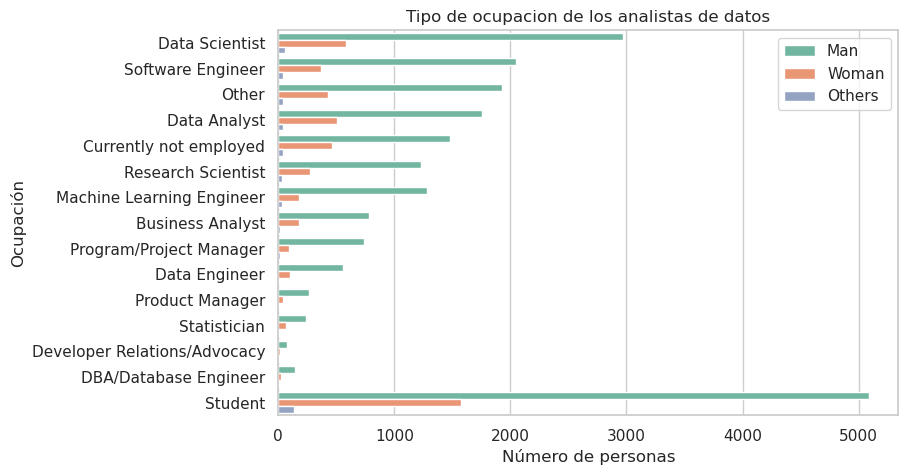

In [22]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= "q5_ocupacion_new", 
            data=df_perfil, 
            hue = "q2_genero_new", 
            palette = 'Set2',
            order=['Data Scientist', 'Software Engineer','Other','Data Analyst', 
                    'Currently not employed', 'Research Scientist', 'Machine Learning Engineer', 
                    'Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 
                    'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer', 'Student']
            );
plt.title('Tipo de ocupacion de los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("Ocupación"); # definir el nombre del eje Y
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/07-Ocupacion-data.png")

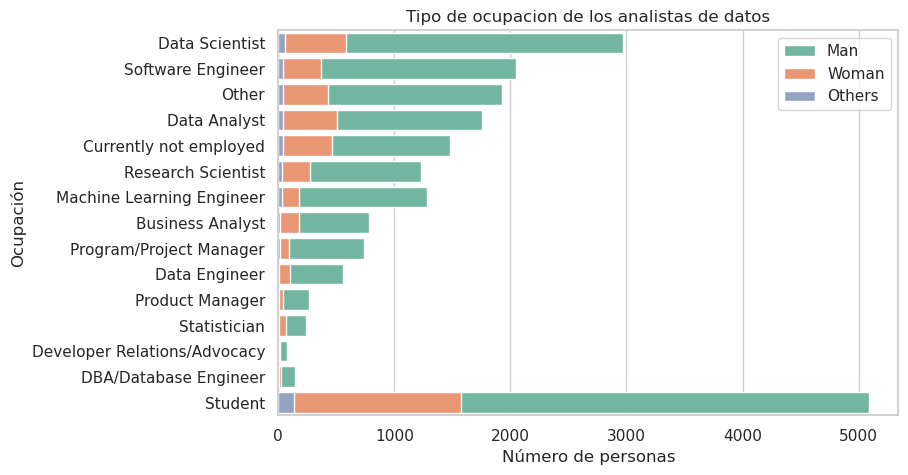

In [23]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= "q5_ocupacion_new", 
            data=df_perfil, 
            hue = "q2_genero_new", 
            palette = 'Set2', dodge = False,
            order=['Data Scientist', 'Software Engineer','Other','Data Analyst', 
                    'Currently not employed', 'Research Scientist', 'Machine Learning Engineer', 
                    'Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 
                    'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer', 'Student']
            );
plt.title('Tipo de ocupacion de los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("Ocupación"); # definir el nombre del eje Y
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/07-Ocupacion-data.png")

In [24]:
# Cambiar posición de leyenda
# plt.legend(loc="lower right")


1.3 Ocupación y nivel de educación

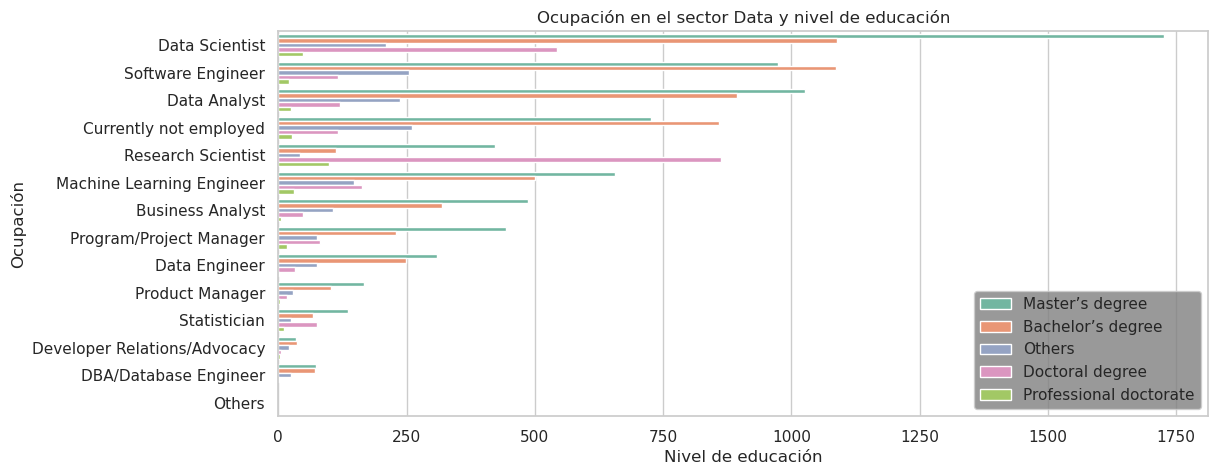

In [25]:
plt.figure(figsize= (12,5))
sns.countplot(y= "q5_ocupacion_new" , 
            data=df_perfil, 
            hue= 'q4_educacion_new',
            palette = 'Set2',
            order=['Data Scientist', 'Software Engineer','Data Analyst', 
                    'Currently not employed', 'Research Scientist', 'Machine Learning Engineer', 
                    'Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 
                    'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer', "Others"],
            hue_order = ['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree','Professional doctorate'])
plt.title('Ocupación en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Ocupación') # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/08-Ocupacion-educacion-data.png") 
plt.show();

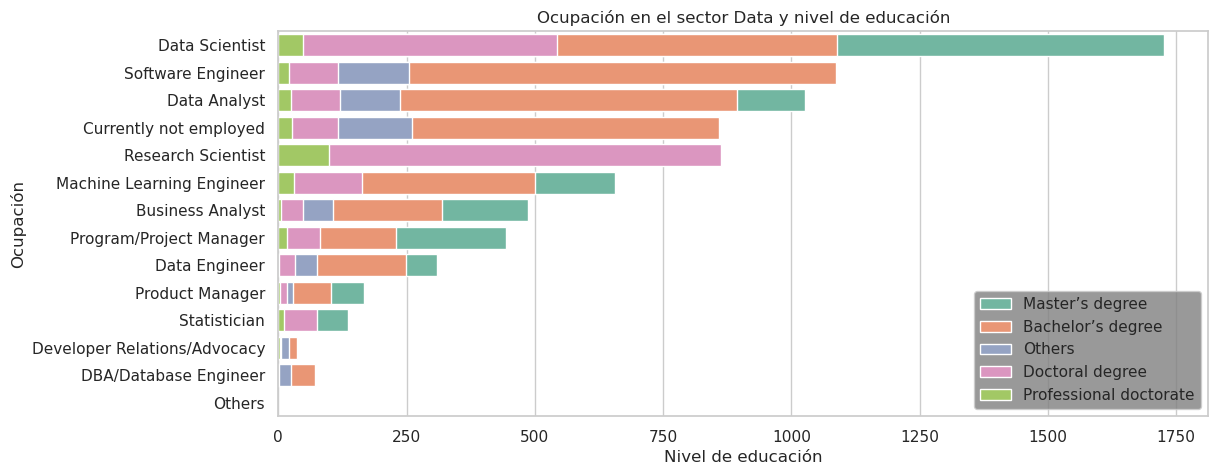

In [26]:
plt.figure(figsize= (12,5))
sns.countplot(y= "q5_ocupacion_new" , 
            data=df_perfil, 
            hue= 'q4_educacion_new',
            palette = 'Set2', dodge = False,
            order=['Data Scientist', 'Software Engineer','Data Analyst', 
                    'Currently not employed', 'Research Scientist', 'Machine Learning Engineer', 
                    'Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 
                    'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer', "Others"],
            hue_order = ['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree','Professional doctorate'])
plt.title('Ocupación en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Ocupación') # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/08-Ocupacion-educacion-data.png") 
plt.show();

In [27]:
# Para que salgan en orden en la gráfica, de mayor a menor presencia
df_analistas['q4_educacion_new'].value_counts().index

Index(['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree',
       'Professional doctorate'],
      dtype='object')

1.3.1 Analistas de datos y nivel de educación

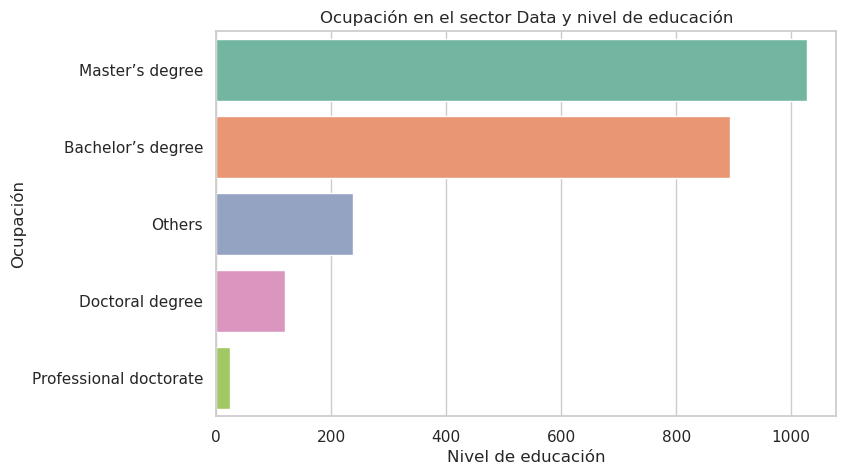

In [28]:
plt.figure(figsize= (8,5))
sns.countplot(y= 'q4_educacion_new' , 
            data=df_analistas, 
            #hue= "q5_ocupacion_new",
            palette = 'Set2',
            order=['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree','Professional doctorate'])
plt.title('Ocupación en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Ocupación'); # definir el nombre del eje Y
plt.savefig("graficas/08-Ocupacion-educacion-data.png")
plt.show();

In [29]:
df_perfil["q6_exp_tech"].value_counts().index

Index(['1-3 years', '< 1 years', '3-5 years', '5-10 years', '10-20 years',
       '20+ years', 'I have never written code'],
      dtype='object')

In [30]:
df_perfil["q2_genero_new"].value_counts().index

Index(['Man', 'Woman', 'Others'], dtype='object')

1.4 Años de experiencia y género

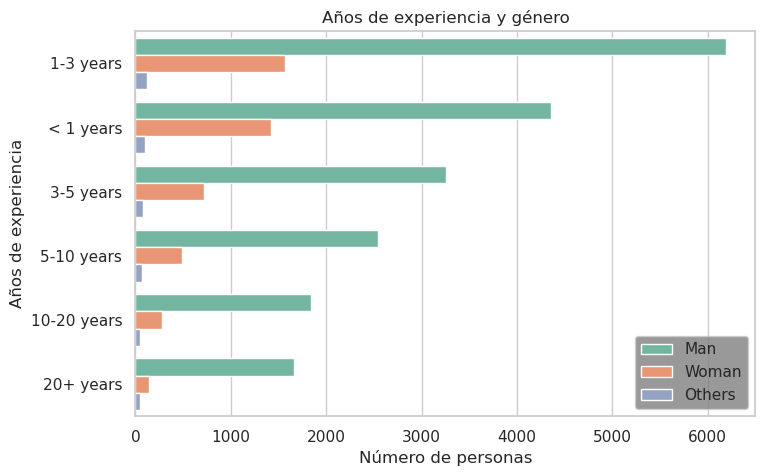

In [31]:
plt.figure(figsize= (8,5))
sns.countplot(y= 'q6_exp_tech' , 
            data=df_perfil, 
            hue= 'q2_genero_new',
            palette = 'Set2',
            order=['1-3 years', '< 1 years', '3-5 years', '5-10 years', '10-20 years','20+ years'],
            hue_order = ['Man', 'Woman', 'Others'])
            
plt.title('Años de experiencia y género')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel('Años de experiencia'); # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/09-experiencia-genero.png")
plt.show();

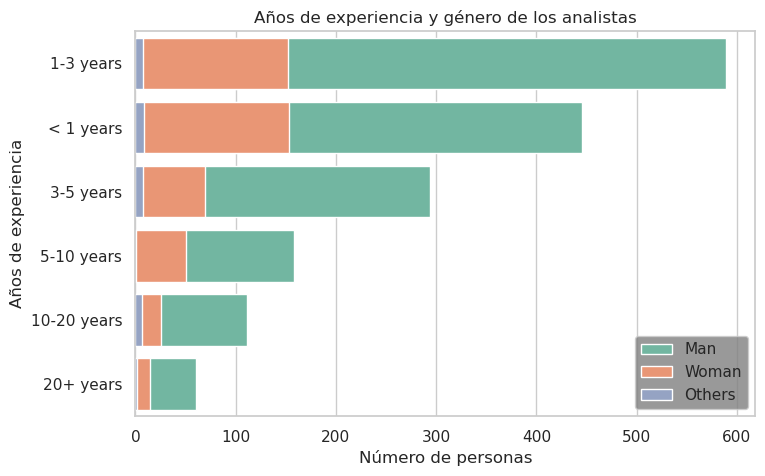

In [32]:
plt.figure(figsize= (8,5))
sns.countplot(y= 'q6_exp_tech' , 
            data=df_analistas, 
            hue= 'q2_genero_new',
            palette = 'Set2', dodge = False,
            order=['1-3 years', '< 1 years', '3-5 years', '5-10 years', '10-20 years','20+ years'],
            hue_order = ['Man', 'Woman', 'Others'])
            
plt.title('Años de experiencia y género de los analistas')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel('Años de experiencia'); # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/09-experiencia-genero.png")
plt.show();

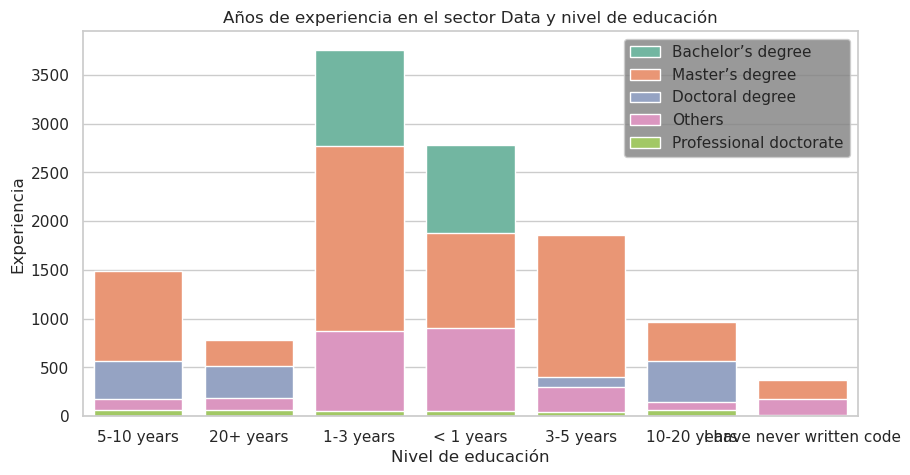

In [33]:
plt.figure(figsize= (10,5))
sns.countplot(x= 'q6_exp_tech' , 
            data=df, 
            hue= 'q4_educacion_new', dodge = False,
            palette = 'Set2')
            
plt.title('Años de experiencia en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Experiencia'); # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="upper right")
plt.savefig("graficas/10-ocupacion-educacion.png")
plt.show();

In [34]:
df2 = pd.read_csv("../data/8.dataframe_limpio.csv", index_col = 0)

# Se hace esto para resetear los índices
df2.reset_index(drop=True , inplace=True)
df2.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q6_exp_num,q25_salario_new,q25_salario_cat
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",52.0,50-59,Man,India,Bachelor’s degree,Other,7.5,27499.5,30.000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",52.0,50-59,Man,Other,Master’s degree,Program/Project Manager,2.0,64999.5,100.000


In [35]:
df["q2_genero_new"].value_counts()

Man       20591
Woman      4889
Others      485
Name: q2_genero_new, dtype: int64

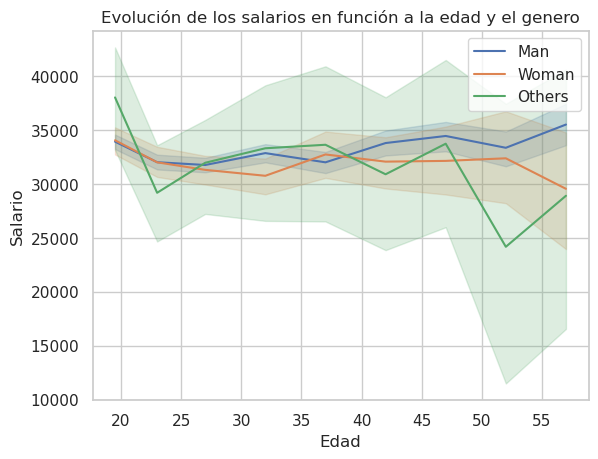

In [36]:
fig = sns.lineplot(x='q1_edad_num', y = 'q25_salario_new', data = df2, hue = "q2_genero_new")
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero')
plt.legend()
plt.savefig("graficas/10-10-experiencia-genero.png");

In [37]:
#df2['q2_genero_new'] = df2['q2_genero_new'] != 'Others'

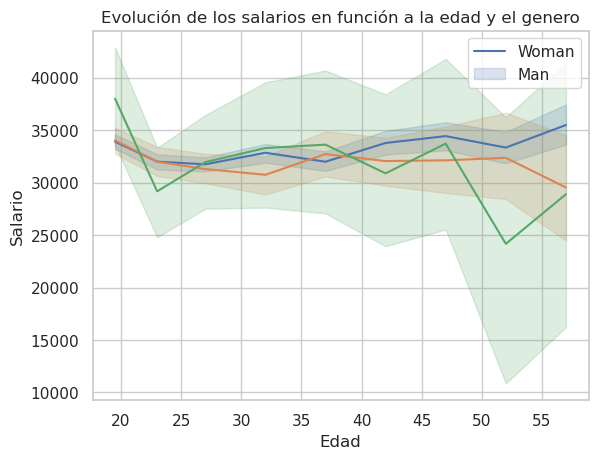

In [38]:
fig = sns.lineplot(x='q1_edad_num', y = 'q25_salario_new', data = df2, hue = 'q2_genero_new')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero')
plt.legend((['Woman','Man']))
plt.savefig("graficas/10-10-experiencia-genero.png");

## Otros gráficos

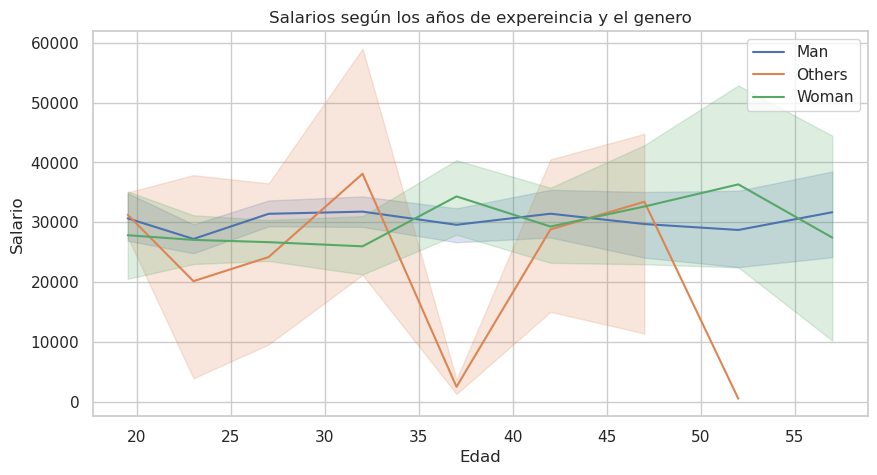

In [65]:
plt.figure(figsize= (10,5))
fig = sns.lineplot(x='q1_edad_num', y = 'q25_salario_new', data = df_analistas, hue = 'q2_genero_new')
# cambiamos el nombre de los ejes
# ponemos título a la gráfica
fig.set(xlabel='Edad', ylabel = 'Salario')
plt.title('Salarios según los años de expereincia y el genero')
plt.tick_params()
plt.legend()
plt.savefig("graficas/10-10-experiencia-genero.png");

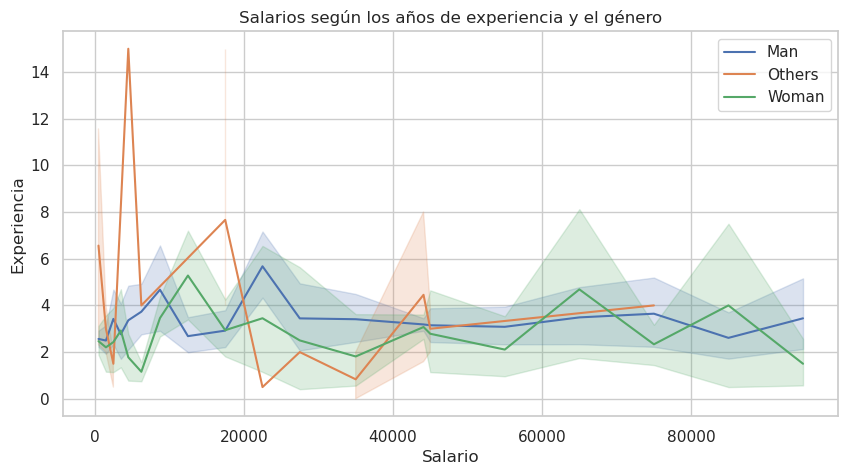

In [66]:
plt.figure(figsize= (10,5))
fig = sns.lineplot(y='q6_exp_num', x = 'q25_salario_new', data = df_analistas, hue = 'q2_genero_new')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Experiencia')
# ponemos título a la gráfica
plt.title('Salarios según los años de experiencia y el género')
plt.tick_params()
plt.legend()
plt.savefig("graficas/10-10-experiencia-genero.png");

In [41]:
df_numerica = df.select_dtypes(include=np.number)
df_numerica.columns

Index(['q1_edad_num', 'q6_exp_num', 'q25_salario_new'], dtype='object')

<AxesSubplot:xlabel='q6_exp_num', ylabel='q1_edad_num'>

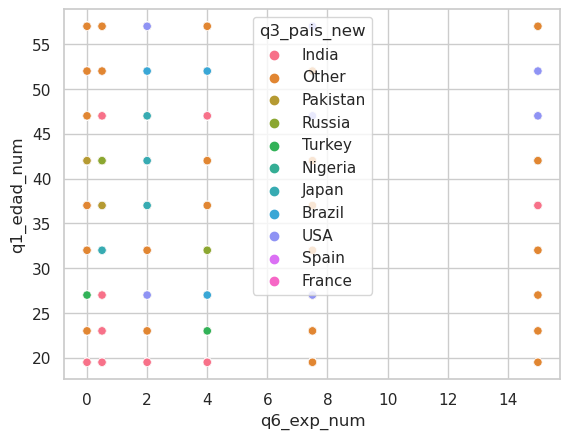

In [42]:
sns.scatterplot(data=df, x='q6_exp_num',y='q1_edad_num', hue= "q3_pais_new")

In [43]:
df_num_analistas= df_analistas.select_dtypes(np.number)

## Todos 

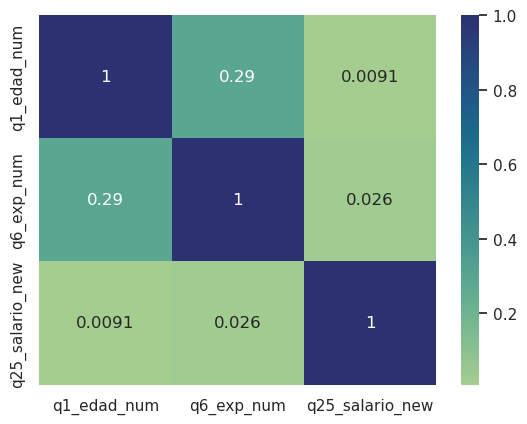

In [44]:
sns.heatmap(df_numerica.corr(),
            cmap= "crest",
            annot=True,
            );

### Analistas

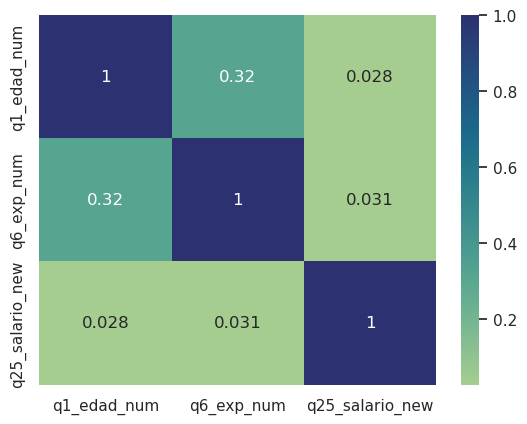

In [45]:
sns.heatmap(df_num_analistas.corr(),
            cmap= "crest",
            annot=True,
            );

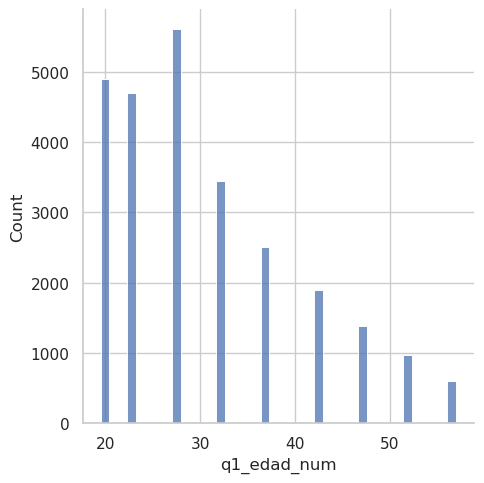

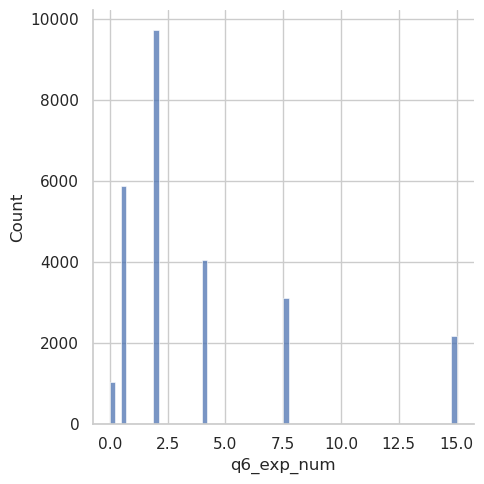

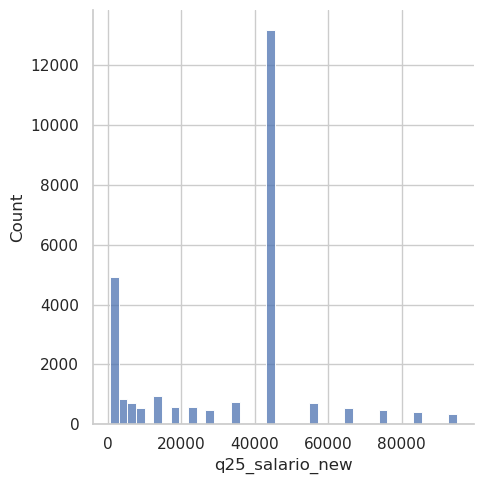

In [46]:
for col in df_numerica.columns:
    sns.displot(df[col])

## Salario analistas de datos según país

Text(0.5, 1.0, 'Salario según el país de residencia de los analistas de datos')

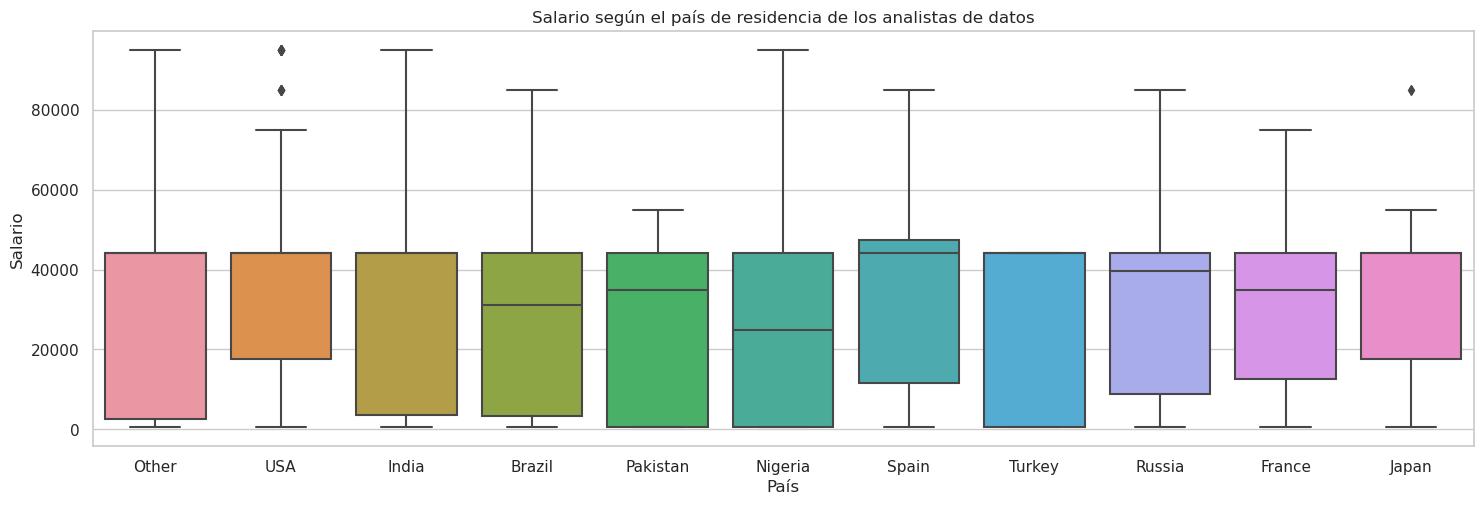

In [74]:
plt.figure(figsize= (15,5))
fig = sns.boxplot (x="q3_pais_new" , y = "q25_salario_new" , data=df_analistas)
fig.set(xlabel='País', ylabel = 'Salario')
plt.tight_layout()
plt.title("Salario según el país de residencia de los analistas de datos")

In [48]:
df_analistas.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q25_salario', 'q33_bigdata_product',
       'q41_h_process_data', 'q1_edad_num', 'q1_edad_new', 'q2_genero_new',
       'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new', 'q6_exp_num',
       'q25_salario_new', 'q25_salario_cat'],
      dtype='object')

Text(0.5, 1.0, 'Salario según la experiencia')

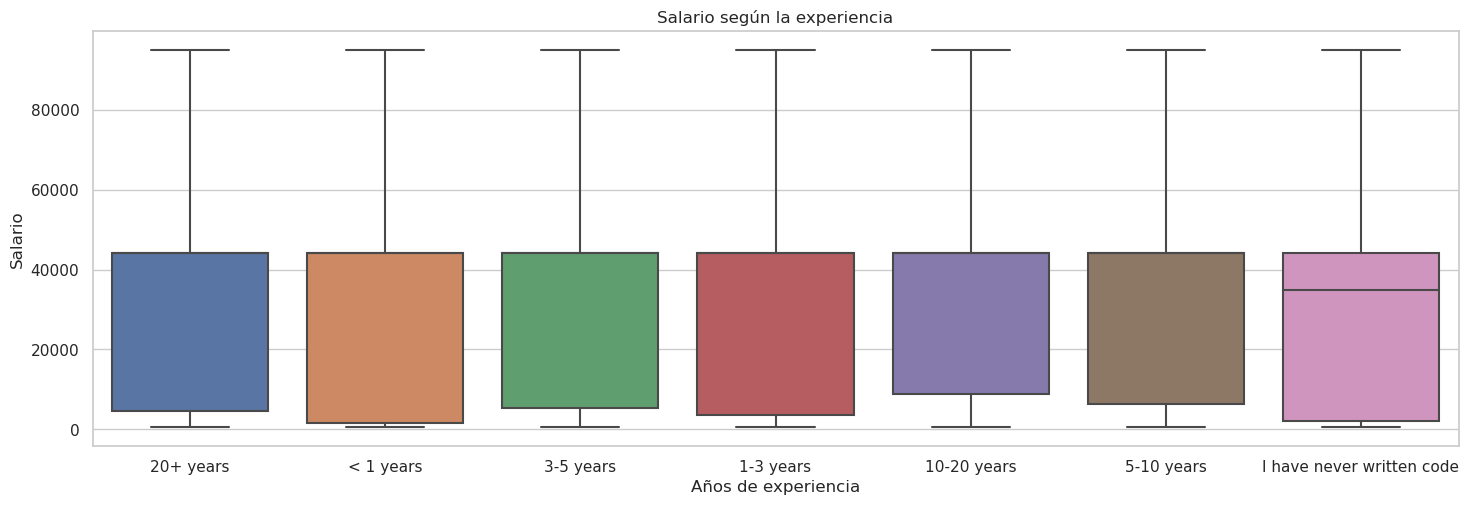

In [73]:
plt.figure(figsize= (15,5))
fig = sns.boxplot (x="q6_exp_tech" , y = "q25_salario_new" , data=df_analistas)
fig.set(xlabel='Años de experiencia', ylabel = 'Salario')
plt.tight_layout()
plt.title("Salario según la experiencia")

In [50]:
df_analistas.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q6_exp_num,q25_salario_new,q25_salario_cat
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",A laptop,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Energy/Mining,"1000-9,999 employees",5-9,"2,000-2,999",Unknown,"Local development environments (RStudio, Jupyt...",52.0,50-59,Man,Other,Bachelor’s degree,Data Analyst,2.0,2499.50000,15.000
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,R,RStudio,A personal computer / desktop,Ggplot / ggplot2,Manufacturing/Fabrication,250-999 employees,3-4,Unknown,Unknown,Unknown,23.0,22-29,Others,USA,Others,Data Analyst,0.5,44098.50117,Unknown


## Salario percibido por los analistas de datos y su género

In [51]:
df_analistas[["q25_salario_cat","q2_genero_new"]].value_counts()

q25_salario_cat  q2_genero_new
15.000           Man              832
                 Woman            249
Unknown          Man              188
60.000           Man              184
30.000           Man              169
100.000          Man              163
15,000           Man              143
250.000          Man               75
Unknown          Woman             68
100.000          Woman             46
60.000           Woman             44
15,000           Woman             37
30.000           Woman             35
250.000          Woman             22
15.000           Others            18
Unknown          Others             6
100.000          Others             4
60.000           Others             4
> 250,000        Woman              4
                 Man                3
15,000           Others             2
30.000           Others             2
> 1.000.000      Man                2
250.000          Others             1
dtype: int64

In [52]:
df_analistas["q2_genero_new"].value_counts()

Man       1759
Woman      505
Others      37
Name: q2_genero_new, dtype: int64

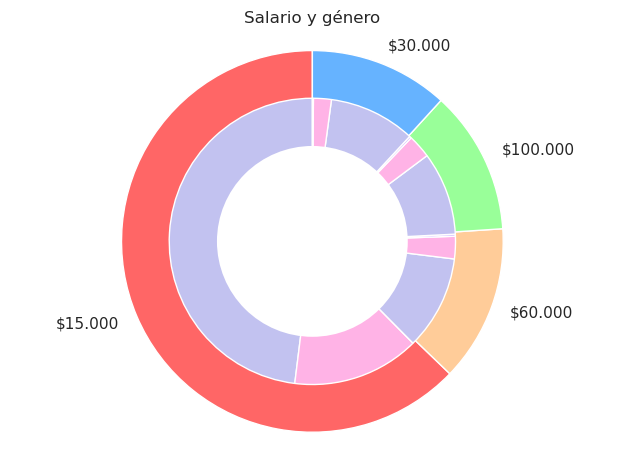

In [53]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['$15.000', '$60.000', '$100.000', '$30.000']
sizes = [1099, 232, 213,206]
labels_gender = ['Man','Woman','Other', 'Man','Woman', 'Other','Man','Woman','Other','Man','Woman','Other']
sizes_gender = [832,249,0,184,44,4,163,46,4,169,35,2]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#ccb3ff', '#c2c2f0','#ffb3e6', '#ccb3ff', '#c2c2f0','#ffb3e6', '#ccb3ff', '#c2c2f0','#ffb3e6','#ccb3ff']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Salario y género")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [54]:
df_analistas.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q25_salario', 'q33_bigdata_product',
       'q41_h_process_data', 'q1_edad_num', 'q1_edad_new', 'q2_genero_new',
       'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new', 'q6_exp_num',
       'q25_salario_new', 'q25_salario_cat'],
      dtype='object')

In [55]:
df['q5_ocupacion_new'].value_counts().index

Index(['Student', 'Data Scientist', 'Software Engineer', 'Other',
       'Data Analyst', 'Currently not employed', 'Research Scientist',
       'Machine Learning Engineer', 'Business Analyst',
       'Program/Project Manager', 'Data Engineer', 'Product Manager',
       'Statistician', 'DBA/Database Engineer',
       'Developer Relations/Advocacy'],
      dtype='object')

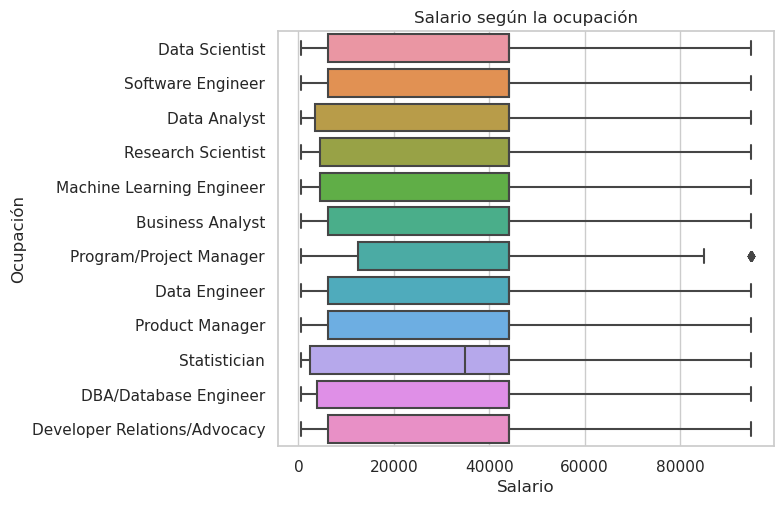

In [70]:
plt.figure(figsize= (8,5))
fig = sns.boxplot (y='q5_ocupacion_new' , x = "q25_salario_new" , data=df, order=['Data Scientist', 'Software Engineer', 'Data Analyst', 
     'Research Scientist', 'Machine Learning Engineer', 'Business Analyst',
       'Program/Project Manager', 'Data Engineer', 'Product Manager',
       'Statistician', 'DBA/Database Engineer',
       'Developer Relations/Advocacy'])
fig.set(xlabel='Salario', ylabel = 'Ocupación')
plt.tight_layout()
plt.title("Salario según la ocupación");

In [57]:
df_analistas['q21_tamanio_cia'].value_counts().index

Index(['0-49 employees', '10,000 or more employees', '1000-9,999 employees',
       '50-249 employees', '250-999 employees', 'Unknown'],
      dtype='object')

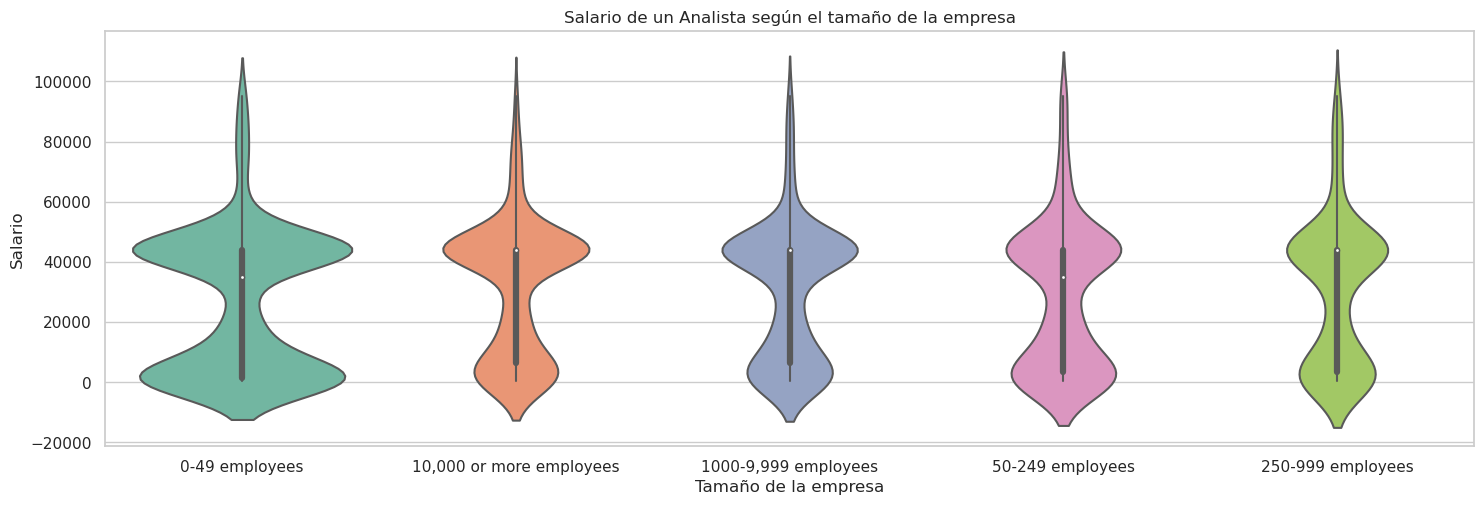

In [71]:
plt.figure(figsize= (15,5))
fig = sns.violinplot (x='q21_tamanio_cia' , 
                y = "q25_salario_new" , 
                data=df_analistas, 
                 palette="Set2",
                 scale= "count",
                order=['0-49 employees', '10,000 or more employees', '1000-9,999 employees',
                    '50-249 employees', '250-999 employees'])
fig.set(xlabel='Tamaño de la empresa', ylabel = 'Salario')
plt.tight_layout()
plt.title("Salario de un Analista según el tamaño de la empresa");

In [59]:
df_numerica.columns

Index(['q1_edad_num', 'q6_exp_num', 'q25_salario_new'], dtype='object')

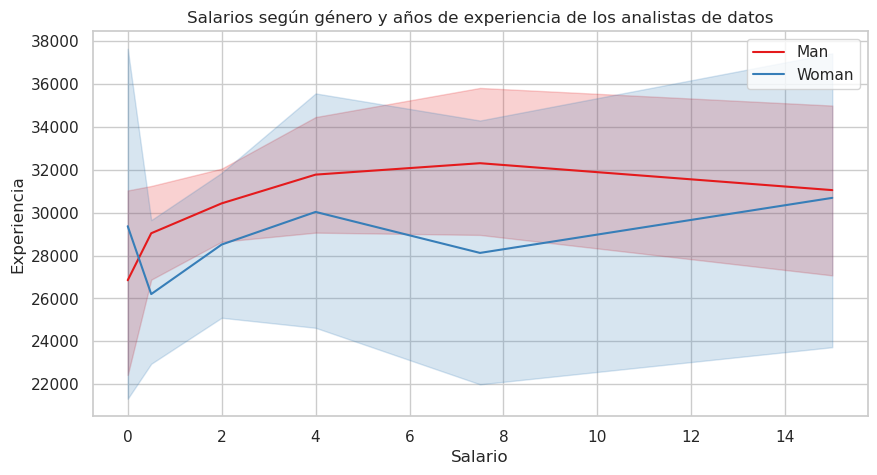

In [72]:
plt.figure(figsize= (10,5))
fig = sns.lineplot(y="q25_salario_new", x = 'q6_exp_num', hue= "q2_genero_new", data = df_analistas, palette="Set1", hue_order=["Man","Woman"])
fig.set(xlabel='Salario', ylabel = 'Experiencia')
# cambiamos el nombre de los ejes
# ponemos título a la gráfica
plt.title('Salarios según género y años de experiencia de los analistas de datos')
plt.tick_params()
plt.legend(loc= "upper right")
plt.savefig("graficas/10-10-experiencia-genero.png");

In [61]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q25_salario', 'q33_bigdata_product',
       'q41_h_process_data', 'q1_edad_num', 'q1_edad_new', 'q2_genero_new',
       'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new', 'q6_exp_num',
       'q25_salario_new', 'q25_salario_cat'],
      dtype='object')

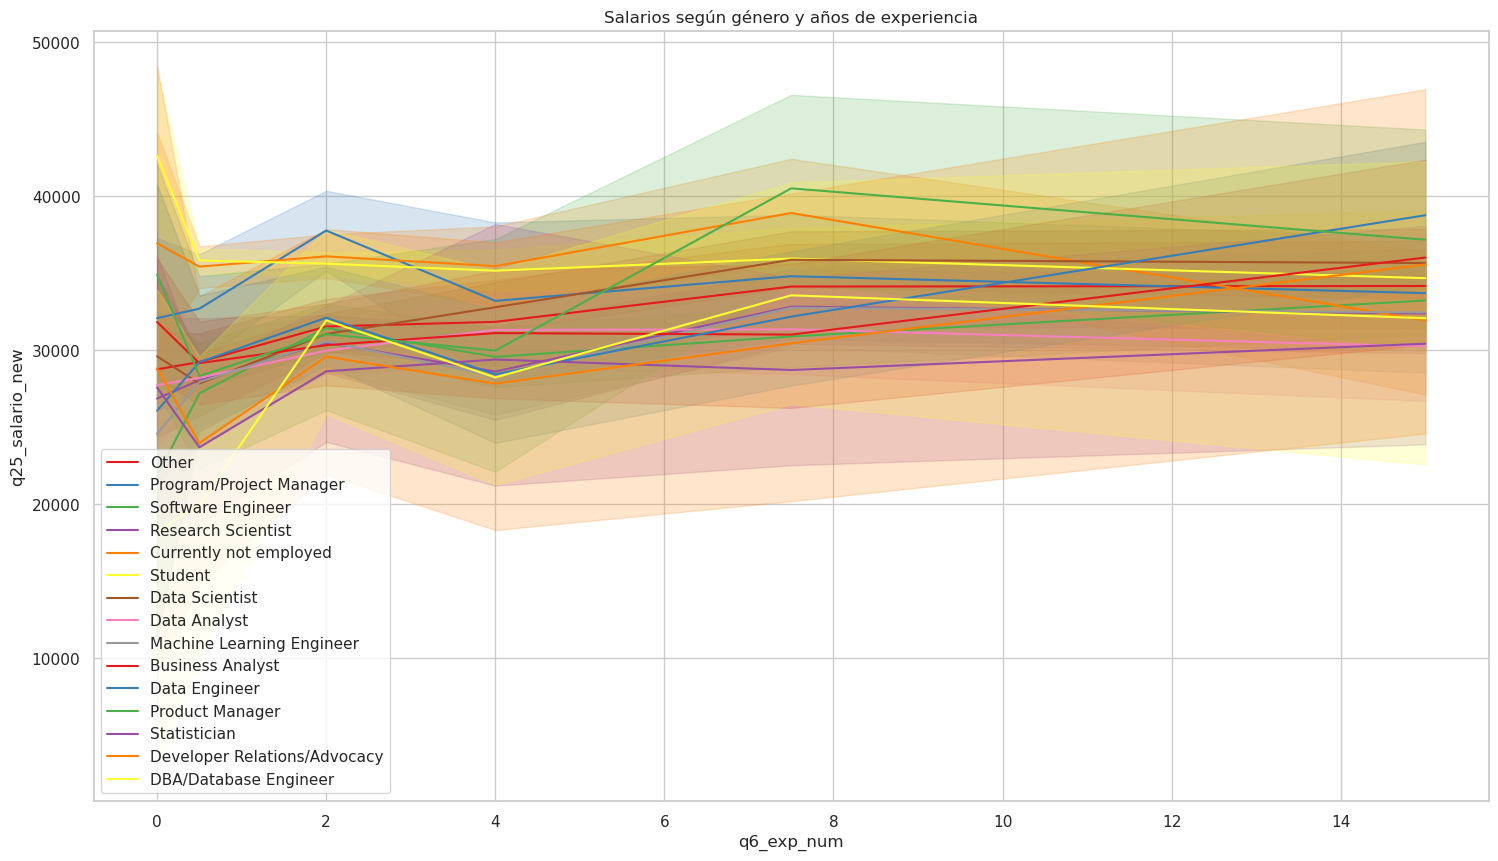

In [62]:
plt.figure(figsize= (18,10))
sns.lineplot(y="q25_salario_new", x = 'q6_exp_num', hue= "q5_ocupacion_new", data = df, palette="Set1")
# cambiamos el nombre de los ejes
# ponemos título a la gráfica
plt.title('Salarios según género y años de experiencia')
plt.tick_params()
plt.legend(loc= "lower left")
# plt.savefig("graficas/10-10-experiencia-genero.png");